# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 


Задача - построить модель для определения стоимости машины.

Важные параметры:

- качество предсказания;
- скорость предсказания;
- время обучения.

Этапы:
1. Подготовка данных.
2. Обучение моделей

    2.1 Линейная регрессия.
    
    2.2 Решающее дерево.
    
    2.3 Случайный лес.
    
    2.4. LightGBM
    
    2.5 Cat Boost.
    
3. Анализ моделей.
4. Выводы

## Подготовка данных

In [1]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

In [2]:
RANDOM_STATE = 12345

In [3]:
df = pd.read_csv('/datasets/autos.csv')

Загружаем датасет. Просматриваем основную информацию.

In [4]:
display(df.head(15))
df.info()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

При предвариетльном осмотре в признаке с количеством фотографий стоят везде "0". Проверим признак на уникальные значения.

In [5]:
df['NumberOfPictures'].unique()

array([0])

Признак неинформативный, на обучение модели не повлияет. Можно его удалить.

In [6]:
df = df.drop('NumberOfPictures', axis = 1)

Проверим данные на явные дубликаты.

In [7]:
df.duplicated().sum() / len(df)

1.1287669068118261e-05

Удаляю

In [8]:
df = df.drop_duplicates()

Дубликатов нет.

Исследуем столбцы на аномальные значения.

In [9]:
def graph(df, columns):
    for i in columns:
        print(i)
        plt.boxplot(df[i])
        plt.show()
        print(df[i].describe())

Исследуем столбцы на аномальные значения.

Рассмотрю численные признаки - цена, мощность, пробег.

Price


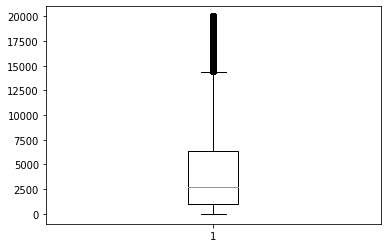

count    354365.000000
mean       4416.679830
std        4514.176349
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: Price, dtype: float64
Power


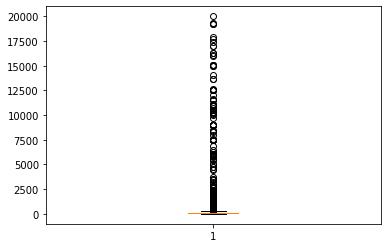

count    354365.000000
mean        110.093816
std         189.851330
min           0.000000
25%          69.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: Power, dtype: float64
Kilometer


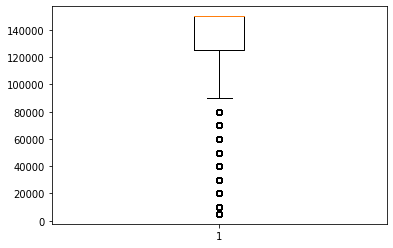

count    354365.000000
mean     128211.363989
std       37905.083858
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: Kilometer, dtype: float64


In [10]:
columns = ['Price', 'Power', 'Kilometer']
graph(df,columns)

Наблюдается аномально низкая цена нанекоторые машины, минимальная цена 0 евро. В признаке мощность выявлены аномально высокие значения. На данный момент максимальная мощность существующей машины окло 620 л.с. Здесь мы видим значения доходящие до 20 000 л.с. Считаю что это может быть связано с ошибкой при заполнении данных, возможно не поставили запятую при разделении целой и десятичной части.

Расчитаем объем аномальных значений.

In [11]:
print('Объем аномальных значений в признаке "Мощность":', 
     len(df[df['Power']>620]) / len(df))
print('Объем аномальных значений в признаке "Цена":', 
     len(df[df['Price']<100]) / len(df))

Объем аномальных значений в признаке "Мощность": 0.0010328333780141943
Объем аномальных значений в признаке "Цена": 0.03757143058710651


Объем небольшой, аномалии можно убрать

In [12]:
df = df.loc[(df['Power']<620) & (df['Price']>100)]

Создам функцию для замены пропусков.
Тип автомобиля будет заполнен на основе уже имеющейся информации о таких же автомобилях. Данные берутся на основе марки и модели автомобиля. Мощность заполняется таким же образом. В признаке мощность встречается не только пропуски но и нулевое значение. Тк у машины явно не может быть нулевое значение, то заменим его также на основе данных из объявлений с такими же признаками.

In [13]:
def fill_na(row):
    
    try:
        if math.isnan(row['VehicleType']):
            try:
                row['VehicleType'] = train_df.loc[(train_df['Brand']==row['Brand'])&(train_df['Model']==row['Model'])
                                                     ].groupby('VehicleType').agg(lambda x:x.value_counts()).index[0]
            except:
                pass
    except:
        pass
    
    try:
        if row['Power'] ==0:
            try:
                row['Power'] = train_df.loc[(train_df['Brand']==row['Brand'])&(train_df['Model']==row['Model'])
                                               ].groupby('Power').agg(lambda x:x.value_counts()).index[0] 
            except:
                pass
    except:
        pass
    
    try:
        if math.isnan(row['Power']):
            try:
                row['Power'] = train_df.loc[(train_df['Brand']==row['Brand'])&(train_df['Model']==row['Model'])
                                               ].groupby('Power').agg(lambda x:x.value_counts()).index[0]
            except:
                pass    
    except:
        pass

    return (row)

In [14]:
df = df.apply(fill_na,axis = 1)

In [15]:
print('Тип автомобиля не определён (%):', df['VehicleType'].isnull().sum() / len(df))

Тип автомобиля не определён (%): 0.09479959374126029


Те данные, где не удалось сделать замену, удалять не буду.
Изучу оставшиеся без заполнения признаки объектов.

In [16]:
df[df['FuelType'].isnull()].head(15)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,PostalCode,LastSeen
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,27472,2016-03-31 17:17:06
13,2016-03-21 21:37:40,2500,wagon,2004,manual,131,passat,150000,2,NaN,volkswagen,no,2016-03-21 00:00:00,90762,2016-03-23 02:50:54
26,2016-03-10 19:38:18,5555,NaN,2017,manual,125,c4,125000,4,NaN,citroen,no,2016-03-10 00:00:00,31139,2016-03-16 09:16:46
36,2016-03-11 11:50:37,1600,other,1991,manual,75,kadett,70000,0,NaN,opel,NaN,2016-03-11 00:00:00,2943,2016-04-07 03:46:09
41,2016-03-30 20:38:20,7500,sedan,2002,auto,306,e_klasse,150000,4,NaN,mercedes_benz,NaN,2016-03-30 00:00:00,33649,2016-04-03 11:44:49
52,2016-04-04 10:57:36,1400,NaN,2016,manual,55,other,5000,1,NaN,hyundai,NaN,2016-04-04 00:00:00,34454,2016-04-06 12:45:43
54,2016-03-17 07:56:40,4700,wagon,2005,manual,0,signum,150000,0,NaN,opel,no,2016-03-17 00:00:00,88433,2016-04-04 04:17:32
57,2016-03-10 20:53:19,2399,NaN,2018,manual,64,other,125000,3,NaN,seat,no,2016-03-10 00:00:00,33397,2016-03-25 10:17:37
65,2016-03-28 17:41:27,10900,NaN,2017,manual,101,astra,50000,3,NaN,opel,no,2016-03-28 00:00:00,63607,2016-04-06 23:15:52
69,2016-04-01 11:56:40,1200,coupe,2001,NaN,0,astra,150000,0,NaN,opel,NaN,2016-04-01 00:00:00,47249,2016-04-07 08:46:07


Есть объекты у которых в основных признаках пропущены практически все важные значения - тип автомобиля, мдель, коробка преедач, данные о ремонте и тип двигателя. Оценим объем таких объектов относительно всего датасета.

In [17]:
len(df.query("VehicleType.isnull() and FuelType.isnull() and Model.isnull()", engine='python')) /len(df)

0.008843487348572942

Менее 1 процента, можно убрать

In [18]:
df = df.query("VehicleType.notnull() and FuelType.notnull() and Model.notnull()", engine='python')

In [19]:
df = df[df['VehicleType'].notna()]

Проведу промежуточную проверку.

In [20]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,PostalCode
count,284185.000000,284185.000000,284185.000000,284185.000000,284185.000000,284185.000000
mean,4917.996055,2002.647677,113.814170,128212.713549,6.088886,51172.092095
std,4609.514907,6.203136,59.952009,36695.362102,3.544751,25716.046403
min,101.000000,1910.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1400.000000,1999.000000,75.000000,125000.000000,3.000000,30900.000000
50%,3250.000000,2003.000000,109.000000,150000.000000,6.000000,50226.000000
75%,7000.000000,2007.000000,146.000000,150000.000000,9.000000,71706.000000
max,20000.000000,2018.000000,606.000000,150000.000000,12.000000,99998.000000


В признаке мощности автомобиля остались объекты с 0 мощностью. Исторически одни из самых маломощных машин были до 20 лс. Сделаю срез по этому уровню.

In [21]:
df[df['Power']<20].head(15)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,PostalCode,LastSeen
15,2016-03-11 21:39:15,450,small,1910,NaN,0,ka,5000,0,petrol,ford,NaN,2016-03-11 00:00:00,24148,2016-03-19 08:46:47
32,2016-03-15 20:59:01,245,sedan,1994,NaN,0,golf,150000,2,petrol,volkswagen,no,2016-03-15 00:00:00,44145,2016-03-17 18:17:43
55,2016-03-26 10:39:35,550,wagon,1999,manual,0,astra,150000,8,gasoline,opel,yes,2016-03-26 00:00:00,56759,2016-04-01 23:17:27
70,2016-03-08 01:36:42,800,small,1993,manual,0,polo,150000,3,petrol,volkswagen,no,2016-03-08 00:00:00,8258,2016-04-05 23:46:00
90,2016-03-23 11:53:21,2400,sedan,2003,manual,0,a4,150000,9,gasoline,audi,NaN,2016-03-23 00:00:00,40210,2016-03-23 11:53:21
98,2016-03-11 19:00:25,4290,bus,2008,manual,0,combo,150000,2,gasoline,opel,no,2016-03-11 00:00:00,23568,2016-04-05 22:45:32
110,2016-04-03 03:57:26,350,small,1998,NaN,0,corsa,150000,2,petrol,opel,NaN,2016-04-03 00:00:00,82110,2016-04-03 08:53:37
158,2016-04-01 16:06:24,800,sedan,1993,manual,0,golf,10000,9,petrol,volkswagen,yes,2016-04-01 00:00:00,65929,2016-04-07 11:17:07
162,2016-03-30 10:50:00,300,small,1994,manual,0,other,150000,7,petrol,mitsubishi,NaN,2016-03-30 00:00:00,26340,2016-03-30 10:50:00
166,2016-03-16 12:53:29,300,wagon,1998,manual,0,v40,150000,6,petrol,volvo,no,2016-03-16 00:00:00,47137,2016-03-25 10:18:16


In [22]:
len(df[df['Power']<20]) / len(df)

0.06571071661065855

Объявления с нулевой мощностью имеют объем окло 6,5%. Большинство признаков в этих объявлениях заполнено, возможно 0 значения связаны с тем, что продавец незнал реальной мощности машины и указал 0. Заменю значение 0 на 'no_info' для сохранения остальных данных. 

In [23]:
df = df.query('Power>20')

В данных присутсвует месяц регистрации автомобиля. В данных есть год. Проверю есть ли какая-то корреляция между ценой и месяцем реистрации.

In [24]:
df['RegistrationMonth'].corr(df['Price'])

0.046943597246208016

Как и ожидалось. Никакой явной взаимосвязи нет. При наличии года регистрации данный признак ненужен для построения модели. Можно удалить столбец с признаком.

In [25]:
df = df.drop('RegistrationMonth', axis = 1)

Проверка столбца с данными года регистрации автомобиля. Определяю максимальную дату создания объявления и автомобиля.

In [26]:
print('Маскимальная дата создания объявления',df['DateCreated'].max())

Маскимальная дата создания объявления 2016-04-07 00:00:00


In [27]:
print('Маскимальная дата регистрации автомобиля',df['RegistrationYear'].max())

Маскимальная дата регистрации автомобиля 2018


Есть объявления в которых год регистрации стоит больше чем текущая дата. Оценю объем таких объектов.

In [28]:
len(df[df['RegistrationYear']>2016])

9

Объем данных небольшой. Можно удалить.

In [29]:
df = df.query("RegistrationYear < 2017")

Уберём из датасета столбцы - Дата скачивания объявления, создания анкеты, почтовый индекс и дата последнего визита. Они не относятся к харрактеристикам машины и никак не влияют на её стоимость. Для создания алгоритма они не нужны.


In [30]:
df = df.drop(['DateCrawled', 'DateCreated' , 'PostalCode', 'LastSeen'], axis = 1)

Обработаю оставшиеся пропуски в признаках и заменю их на на значение "no_info".
Наличие пропусков в двнных не окажет критического вдияния, тк их немного и данные для предсказания также поступать с пропусками.

Т.к. достоверно неизвестно отдавал ли владелец машину в ремонт или нет, заполнять пропуски в признаке "NotRepaired" каким либо значением не буду.

In [31]:
df = df.fillna('no_info')

Основные пропуски заполнены. Данные восстановлены на основе имеющихся. Прлпуски заменены информацией о пропуске значения.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265493 entries, 2 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             265493 non-null  int64 
 1   VehicleType       265493 non-null  object
 2   RegistrationYear  265493 non-null  int64 
 3   Gearbox           265493 non-null  object
 4   Power             265493 non-null  int64 
 5   Model             265493 non-null  object
 6   Kilometer         265493 non-null  int64 
 7   FuelType          265493 non-null  object
 8   Brand             265493 non-null  object
 9   NotRepaired       265493 non-null  object
dtypes: int64(4), object(6)
memory usage: 22.3+ MB


Промежуточные выводы:
1. Загружен датасет.
2. удалены явные дубликаты.
3. Обработаны пропуски. 
4. Обнаружены аномальные данные:
    4.1. Машины с мощностью 0 и более 650 л.с.
    4.2. Цена машины ниже 100 евро.
    4.3. Максимальный километраж 150 т. км. Более 50% машин выставлены с таким пробегом.
    Данные аномальные значения возможно можно объяснить человеческим фактором, ошибки при заполнении данных пользователями.

## Обучение моделей

Преобразуем категориальные признаки в численные.

Выделим целевой признак и разобьём выборки. 

In [34]:
df_ohe = pd.get_dummies(df, drop_first=True)

features = df_ohe.drop('Price', axis = 1)
target = df_ohe['Price']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE)

Обучим модель линейной регрессии.

In [35]:
%%time
model = LinearRegression()
model.fit(features_train, target_train)

CPU times: user 22.4 s, sys: 49.6 s, total: 1min 11s
Wall time: 1min 12s


LinearRegression()

In [36]:
%%time
predicts = model.predict(features_test)

CPU times: user 144 ms, sys: 165 ms, total: 309 ms
Wall time: 297 ms


In [37]:
RMSE_reg = mean_squared_error(target_test, predicts, squared=False)

Дерево решений

In [38]:
%%time
model = DecisionTreeRegressor(random_state=RANDOM_STATE)
model.fit(features_train, target_train)

CPU times: user 6.24 s, sys: 113 ms, total: 6.35 s
Wall time: 6.36 s


DecisionTreeRegressor(random_state=12345)

In [39]:
%%time
predicts = model.predict(features_test)

CPU times: user 77.2 ms, sys: 77.3 ms, total: 155 ms
Wall time: 159 ms


In [40]:
RMSE_des_tree = mean_squared_error(target_test, predicts, squared=False)

Модель случайного леса

Подбираю гиперпараметры

In [41]:
model = RandomForestRegressor()
params = {
    'max_depth': [1, 3, 5, 10],
    'n_estimators': [5, 10, 15]}

grid = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv = 3)

In [42]:
grid.fit(features_train, target_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 3, 5, 10],
                         'n_estimators': [5, 10, 15]},
             scoring='neg_mean_squared_error')

Обучаю модель на лучших гиперпараметрах

In [43]:
%%time
model = RandomForestRegressor(max_depth=grid.best_params_['max_depth'], n_estimators = grid.best_params_['n_estimators'], random_state=RANDOM_STATE)
model.fit(features_train, target_train)

CPU times: user 34.4 s, sys: 199 ms, total: 34.6 s
Wall time: 34.6 s


RandomForestRegressor(max_depth=10, n_estimators=15, random_state=12345)

In [44]:
%%time
predicts_rand_for = model.predict(features_test)

CPU times: user 136 ms, sys: 76.2 ms, total: 212 ms
Wall time: 216 ms


In [45]:
RMSE_rand_for = mean_squared_error(target_test, predicts_rand_for, squared=False)

Пробую градиентный бустинг начну с LightGBM

Разделим выборки без изменений. Сначала изменю тип признака.

In [46]:
df[['VehicleType','Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']] = df[['VehicleType','Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']].astype("category")

In [47]:
features = df.drop('Price', axis = 1)
target = df['Price']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE)

Подбираю гиперпараметры.

In [48]:
model = LGBMRegressor()
params = {
    'num_leaves': [7, 14, 20],
    'max_depth': [1, 3, 5],
    'n_estimators': [10, 20, 30]}

grid = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv = 3)

In [49]:
grid.fit(features_train, target_train)

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'max_depth': [1, 3, 5], 'n_estimators': [10, 20, 30],
                         'num_leaves': [7, 14, 20]},
             scoring='neg_mean_squared_error')

Обучаю модель на лучших гиперпараметрах.

In [50]:
%%time
model = LGBMRegressor(max_depth=grid.best_params_['max_depth'], n_estimators = grid.best_params_['n_estimators'],
                      num_leaves = grid.best_params_['num_leaves'], random_state=RANDOM_STATE)
model.fit(features_train, target_train)

CPU times: user 1.59 s, sys: 0 ns, total: 1.59 s
Wall time: 1.6 s


LGBMRegressor(max_depth=5, n_estimators=30, num_leaves=20, random_state=12345)

In [51]:
%%time
predicts_lgbmr = model.predict(features_test)

CPU times: user 195 ms, sys: 0 ns, total: 195 ms
Wall time: 197 ms


In [52]:
RMSE_lgbmr = mean_squared_error(target_test, predicts_lgbmr, squared=False)

Теперь обучим модель и сделаем предсказания на CatBoost

In [53]:
c_f = cat_features=['VehicleType','Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

In [54]:
model = CatBoostRegressor( cat_features= c_f, silent = True)
params = {'depth': [6,8,10],
          'learning_rate': [0.01, 0.05, 0.1],
          'iterations': [30, 50, 100]}

grid = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv = 3)

In [55]:
grid.fit(features_train, target_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fcc019dcc70>,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='neg_mean_squared_error')

In [56]:
%%time
model = CatBoostRegressor(depth = grid.best_params_['depth'], learning_rate = grid.best_params_['learning_rate'],
                          iterations = grid.best_params_['iterations'], cat_features= c_f, silent = True)
model.fit(features_train, target_train)

CPU times: user 11.7 s, sys: 94.2 ms, total: 11.8 s
Wall time: 12.4 s


In [57]:
%%time
predicts_CB = model.predict(features_test)

CPU times: user 69.9 ms, sys: 3.83 ms, total: 73.8 ms
Wall time: 71.1 ms


In [58]:
RMSE_CB = mean_squared_error(target_test, predicts_CB, squared=False)

Промежуточные выводы:
1. Обучены модели регрессии - линейная регрессия, дерево решений, случайный лес, LightGBR, CatBoost.
2. Лучшее время обучения - LightGBM.
3. Лучшая скорость предсказания - CatBoost.
4. Лучшее качество предсказания - CatBoost.

## Анализ моделей

In [59]:
print('RMSE линейной регрессии:', RMSE_reg)
print('RMSE дерева решений:', RMSE_des_tree)
print('RMSE случайного леса:', RMSE_rand_for)
print('RMSE LightGbM', RMSE_lgbmr)
print('RMSE CatBoost', RMSE_CB)

RMSE линейной регрессии: 2488.3811254539264
RMSE дерева решений: 1797.8457407852195
RMSE случайного леса: 1828.7572566241304
RMSE LightGbM 1756.8744738097193
RMSE CatBoost 1614.608590227124


Лучший результат по метрике RMSE - CatBoost.

## Выводы

1. Загружены данные.
2. обработаны пропуски в данных, удалены дубликаты.
3. Выявлены аномальные значения в признках - Цена, Мощность и пробег.
4. Данные разбиты на 2 выборки и обучены модели регрессии - линейная, решающее дерево, случайный лес, LightGBR, CatBoost.
5. Определена самая быстро обучаемая модель - LightGBM.
6. Модель с максимальной скоростью предсказаний - CatBoost.
6. Модель с лучшей метрикой RMSE - 1614, CatBoost.

Рекомендуемая модель - CatBoost.